# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [400]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [401]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [402]:
# returns the last first 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row has information on the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [403]:
# "dataframe.shape" in Pandas returns a tuple (a,b)that gives the dimensions of the dataframe
# (a,b)= (number of rows, number of columns)

print(df.shape)
print('_'*55) # Print separator line

#Print the message indicating the number of rows and columns.
print('There are',df.shape[0],'rows and',df.shape[1],'columns present in the data.')

(1898, 9)
_______________________________________________________
There are 1898 rows and 9 columns present in the data.


#### Observations:
* There are 1898 rows and 9 columns in the DataFrame*

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [404]:
# Use info() to print a concise summary of the DataFrame
# info () returns each variable present in the data with their corresponding type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
'''
***There are 9 columns in the data:*** 
* The values in columns 'order_id', 'customer_id','food_preparation_time', and 'delivery' are all integers(int64).
* The values in columns 'restaurant_name', 'cuisine_type','day_of _the_week', and 'rating' are all objects. 
* The values in column 'cost_of_the_order' is float(float64)
'''   

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [405]:
""" The Previous line of code with the method info() displays a Non-null Count column 
    which we can use to check any missing value against the number of entries."""

# Check for missing values and print appropriate message

if df.isnull().sum().sum()>0:
   print('There are missing values in the data.')
else:
    print('There are no missing values in the data')

print('_'*40) # Print separator line

df.isnull().sum() # This method displays the number of missing values in each column of the data.

There are no missing values in the data
________________________________________


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There are no missing values in the DataFrame. Therefore, there is no need to treat missing data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [406]:
"""The method describe() generates descriptive statistics such as count, mean value, standard deviation, 
    min value, 25th percentile, 50th percentile, 75th percentile, and max value """

# Display descriptive statistics for all columns (count, mean, std, min, 25%, 50%, 75%, and max)
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [407]:
# Display descriptive statistics for numeric columns only (count, mean, std, min, 25%, 50%, 75%, and max)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [408]:
"""The data from the descriptive statistics for numeric columns only are used to display 
   the minimum, average, and maximum time it takes for food to be prepared once an order is placed.""" 

# Access the minimum, average, and maximum time of the 'food_preparation_time' column from the data.
min_time_for_food_preparation = df.describe().T.loc['food_preparation_time', 'min']
average_time_for_food_preparation = df.describe().T.loc['food_preparation_time', 'mean']
max_time_for_food_preparation = df.describe().T.loc['food_preparation_time', 'max']

# Display the minimum, average, and maximum time of the 'food_preparation_time' column in the data.
print('The minimum time it takes for food to be prepared once an order is placed is',min_time_for_food_preparation, 'minutes')
print('The average time it takes for food to be prepared once an order is placed is',average_time_for_food_preparation,'minutes')
print('The maximum time it takes for food to be prepared once an order is placed is',max_time_for_food_preparation,'minutes')

The minimum time it takes for food to be prepared once an order is placed is 20.0 minutes
The average time it takes for food to be prepared once an order is placed is 27.371970495258168 minutes
The maximum time it takes for food to be prepared once an order is placed is 35.0 minutes


#### Observations:
* The minimum time it takes for food to be prepared once an order is placed is 20.0 minutes.
* The average time it takes for food to be prepared once an order is placed is 27.371970495258168 minutes.
* The maximum time it takes for food to be prepared once an order is placed is 35.0 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [409]:
# Recall the structure of the data 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


***The first and second rows in the rating column show not given rating. This suggests that there are orders that are not rated.***  

In [410]:
# Display the count of all unique values in the column rating. 
print(df['rating'].value_counts(dropna=False))

print('_'*30) # Print separator line

# Print the message indicating the number of orders not rated.
print('There are',df['rating'].value_counts(dropna=False)['Not given'],'not rated orders.')

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
______________________________
There are 736 not rated orders.


#### Observations:
* There are 736 not rated orders out of 1898.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

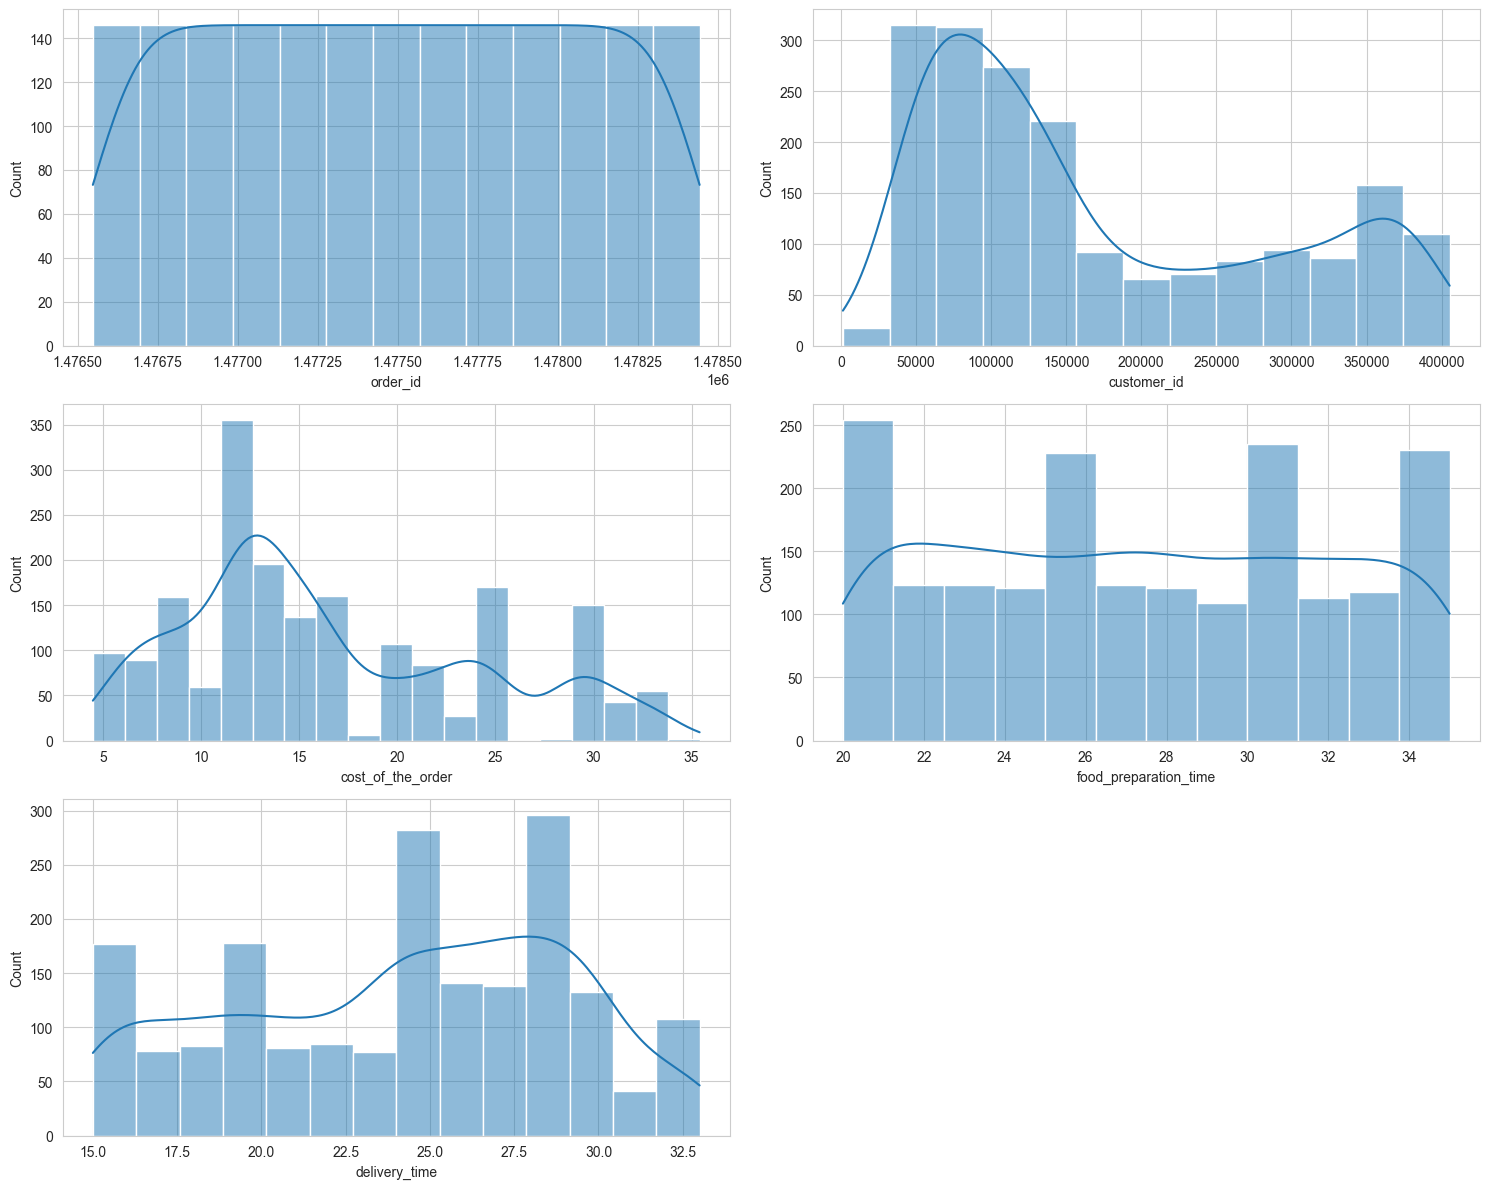

In [411]:
"""Exploration of numeric variables"""

# Displays the distribution of different variables in the data through histograms

# Select the numerical columns of data and add their names to a list 'numeric_columns'
numeric_columns = ['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']

plt.figure(figsize=(15, 12)) # Creates figures with 15 inches width, 10 inches height

for i, variable in enumerate(numeric_columns):
    plt.subplot(3,2,i+1)                        # Creates axes for each subplot.
    sns.histplot(data=df, x=variable, kde=True) # Display a histogram for each numeric column within the variable "numeric_columns". 

plt.tight_layout() # Adjust the padding between and around subplots to display a clear graph without overlaps. 
plt.show()

### Observations:
- The first histogram shows the distribution of the variable 'order_id'. Every value in the column 'order_id' is unique. This explains the uniform distribution on the histogram.
- The second histogram shows the distribution of the variable 'customer_id'. The distribution is skewed to the right with no outliers.
- The third histogram shows the distribution of the variable 'cost_of_the_order'. The distribution is skewed to the right with no outliers.
- The fourth histogram shows the distribution of the variable 'food_preparation_time'. The distribution looks symmetric with no outliers.
- The five histogram shows the distribution of the variable 'delivery_time'. The distribution looks skewed to the left with no outliers.

***We can confirm the skewness of each distribution and possible outliers with boxplots.*** 

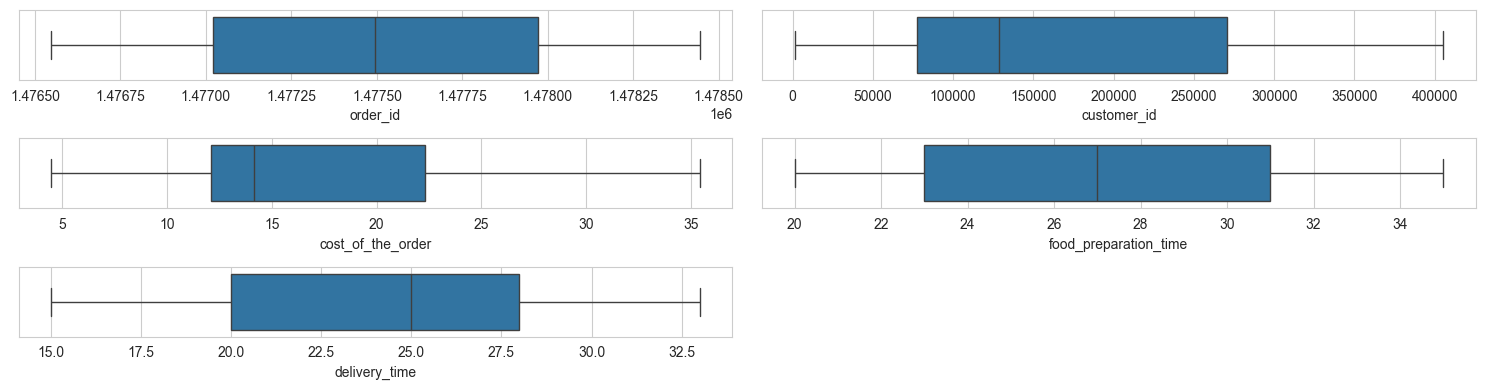

In [412]:
# Display the distribution of different variables in the data through boxplots.
# Outlier detection using boxplot.

plt.figure(figsize=(15, 4)) # Creates figures with 15 inches width, 10 inches height.

for i, variable in enumerate(numeric_columns):
    plt.subplot(3,2,i+1)                        # Creates axes for each subplot.
    sns.boxplot(data=df, x=variable, whis=1.5) # Display a histogram for each numeric column within the variable "numeric_columns".  

plt.tight_layout() # Adjust the padding between and around subplots to display a clear graph without overlaps. 
plt.show()

In [413]:
# Outlier detection using the interquartile range formula (IQR).

# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

# All values outside the interval [lower_whisker, upper_whisker] are outliers. 

# Percentage of outliers in each column
((df[numeric_columns] < lower_whisker) | (df[numeric_columns] > upper_whisker)).sum()/df.shape[0]*100

order_id                 0.0
customer_id              0.0
cost_of_the_order        0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64

### Observation:
* The boxplots confirm that skewness the data and that there are no outliers in the data.

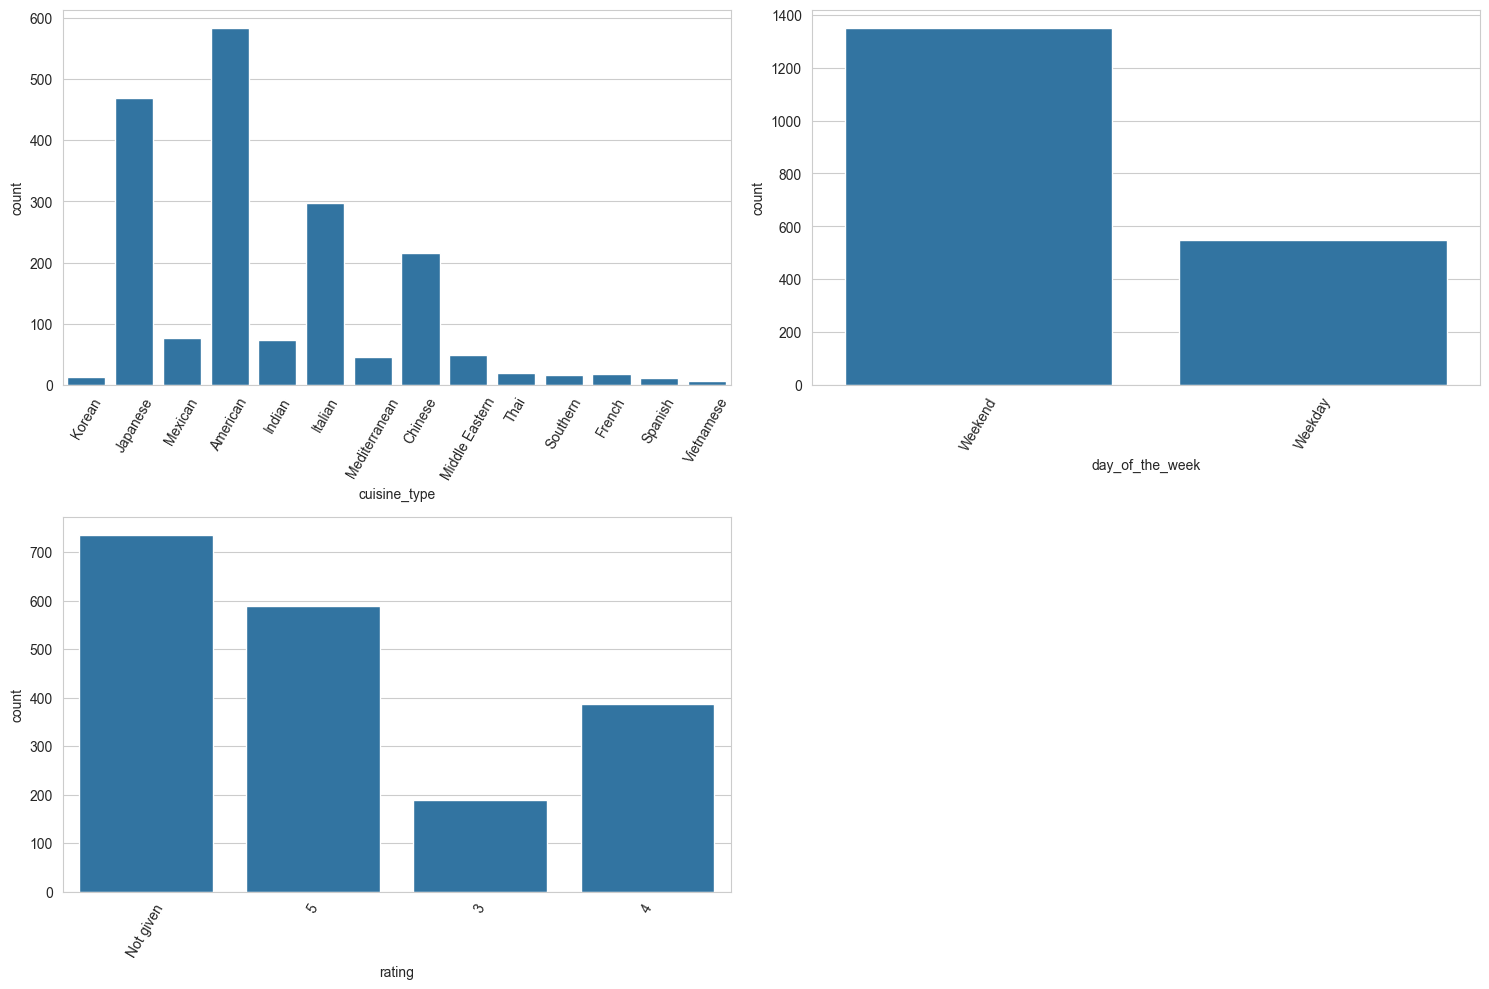

In [414]:
''' Exploration of categorical variables.'''

# Displays the distribution of different variables in the data through countplot.

# Select the categorical columns of data, except 'restaurant_name', and add their names to a list. 

categorical_columns = ['cuisine_type', 'day_of_the_week', 'rating']

plt.figure(figsize=(15, 10)) # Creates figures with 15 inches width, 10 inches height.

for i, variable in enumerate(categorical_columns):
    plt.subplot(2,2,i+1)                        # Creates axes for each subplot.
    sns.countplot(data=df, x=variable)          # Display a countplot for each numeric column within the variable "categorical_columns".  
    plt.xticks(rotation=60)                     # Rotate x-axis labels for better visibility

plt.tight_layout() # Adjust the padding between and around subplots to display a clear graph without overlaps. 
plt.show()


### Observation:
- The countplots show that the categorical variable 'cuisine_type', 'day_of_the week', and 'rating' are all skewed to the right and have not outliers.

/usr/local/Cellar/jupyterlab/4.1.3/libexec/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 140 (\x8c) missing from current font.

/usr/local/Cellar/jupyterlab/4.1.3/libexec/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 142 (\x8e) missing from current font.



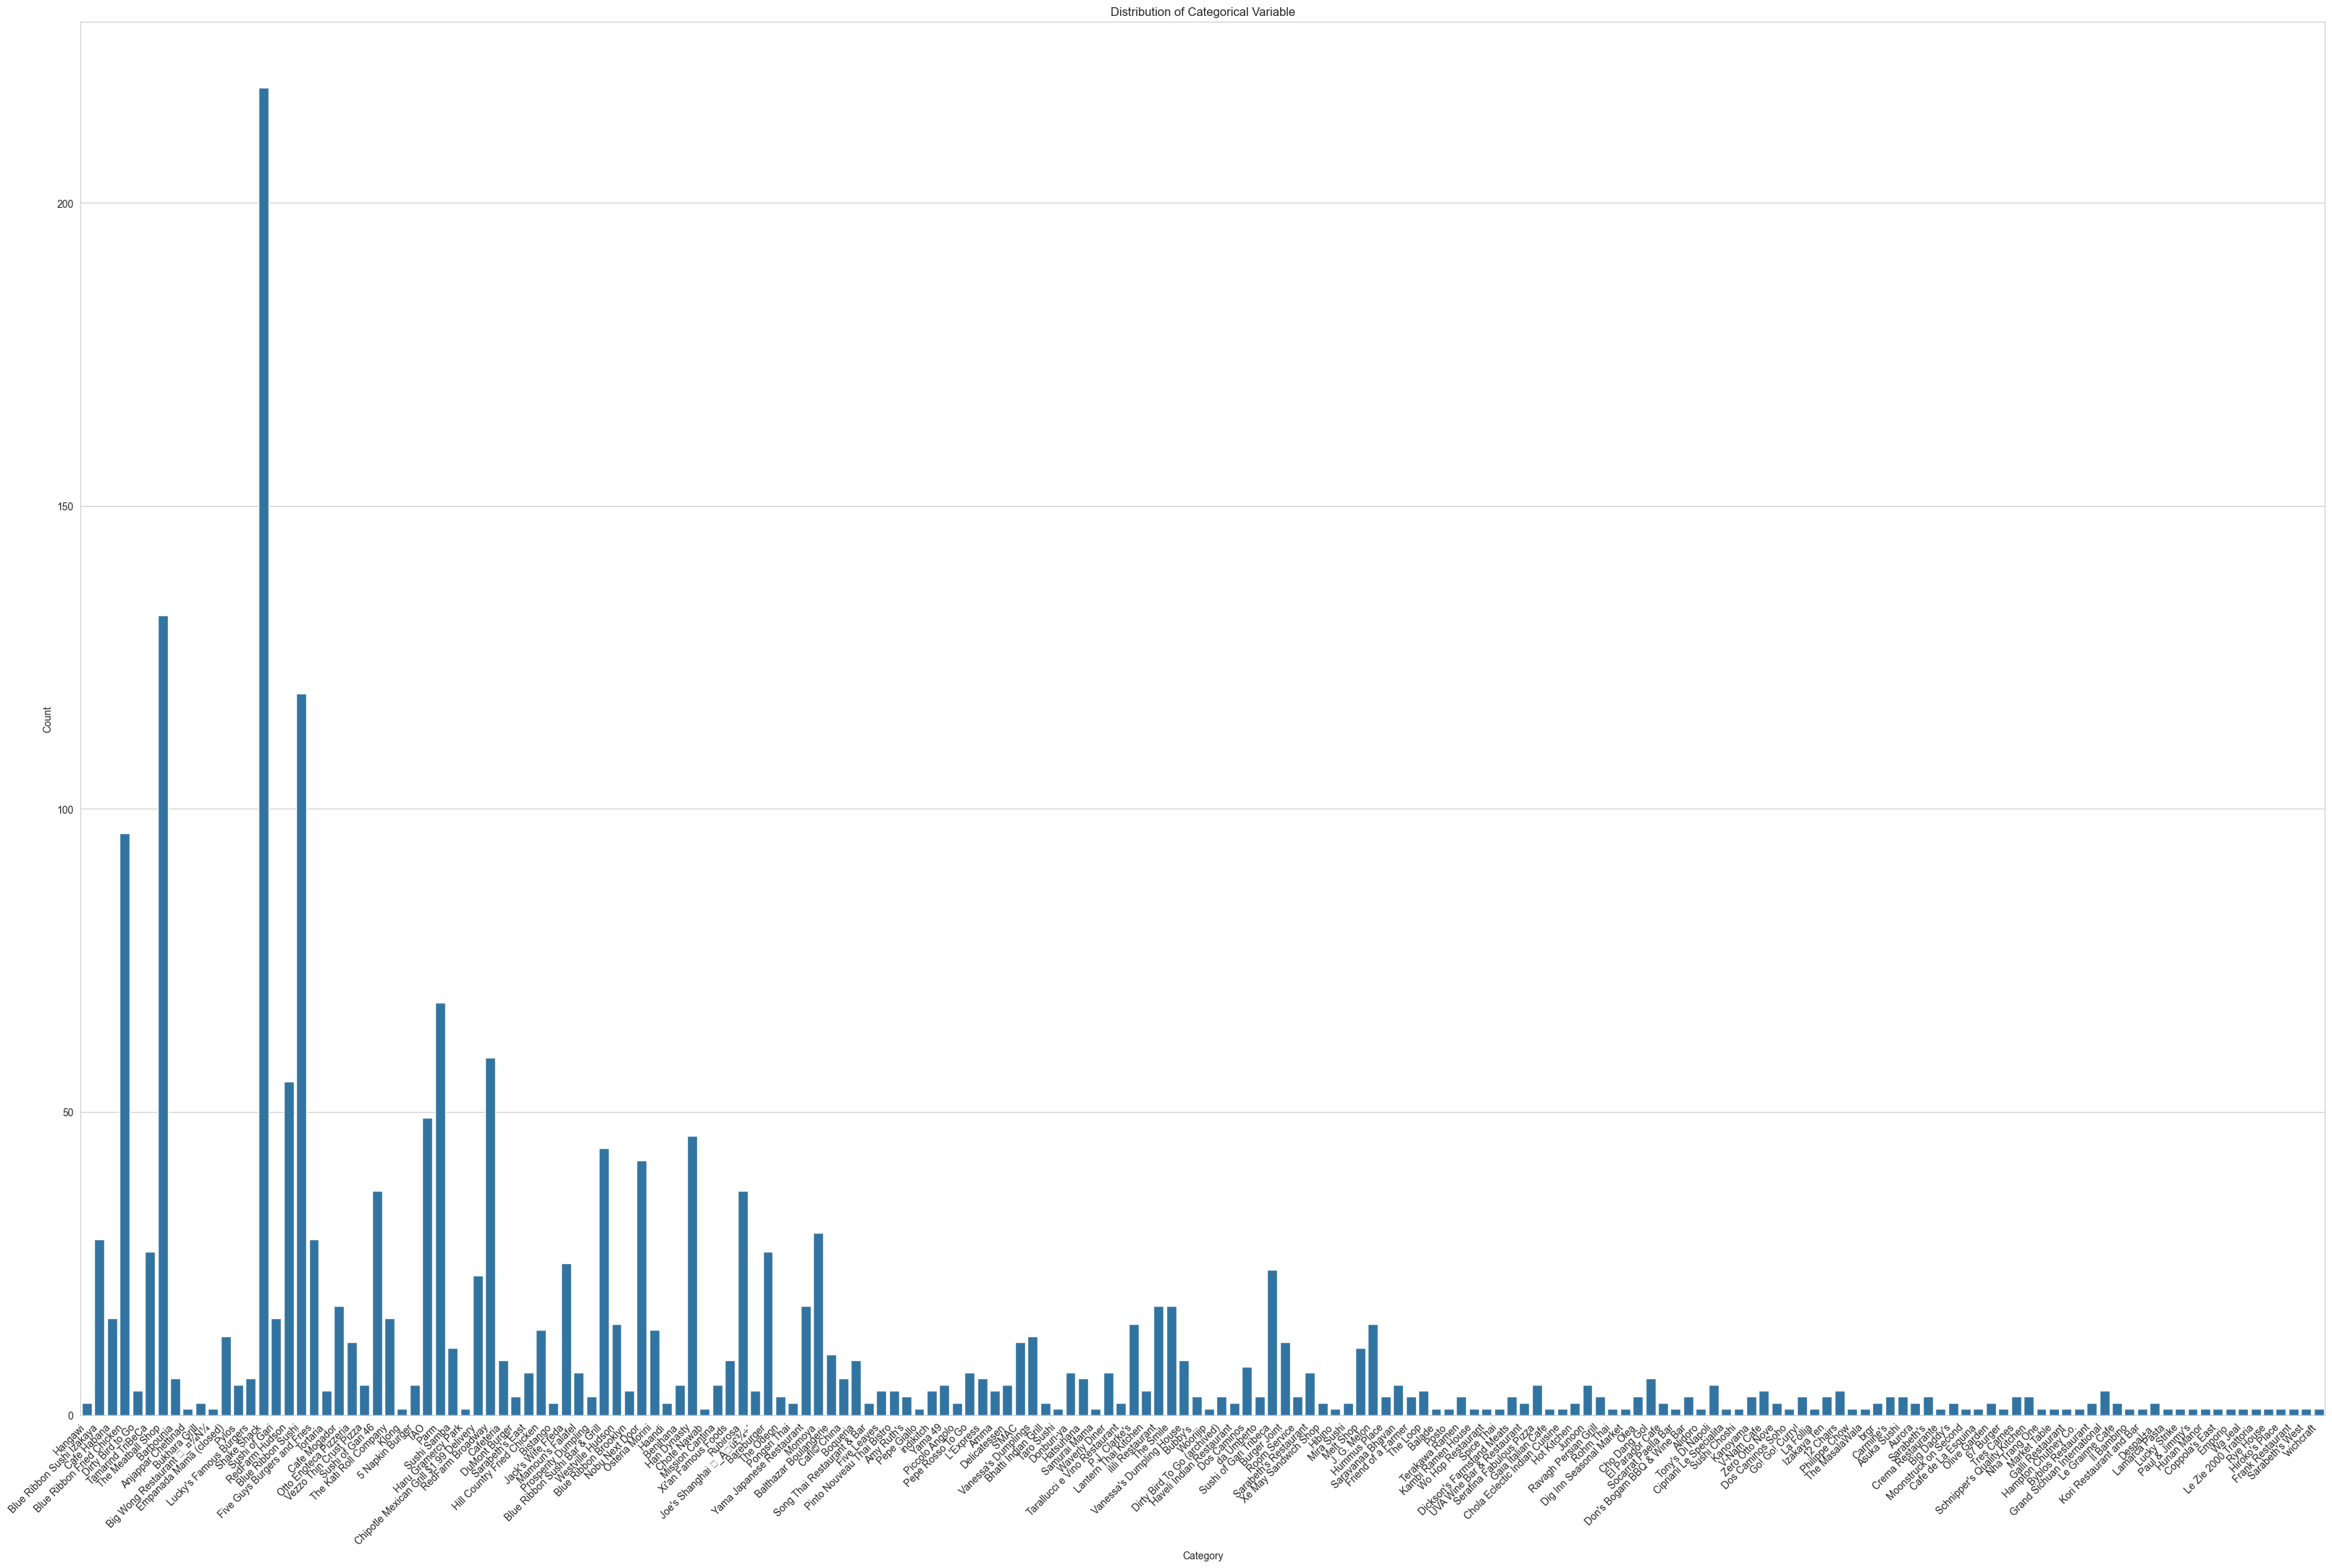

In [415]:
"""Exploration of the categorical variable 'restaurant_name'."""

# Displays the distribution of different values in the column 'restaurant_name'.

plt.figure(figsize=(40, 25))                      # Creates figures with 40 inches width, 25 inches height.
sns.countplot(data=df, x='restaurant_name')       # Display a countplot for the values in the column. 
plt.xticks(rotation=45, ha='right')               # Rotate x-axis labels for better visibility
plt.xlabel('Category')                            #Label the X-axis as Category
plt.ylabel('Count')                               #Label the Y-axis as Count
plt.title('Distribution of Categorical Variable') # Give a title to the graph
plt.show()

### Observation:
- The values in the column 'restaurant_name' are skewed to the left with no outliers. We can see a peak in the distribution, however, we cannot read the name of the corresponding restaurant which has the highest number of orders. The values on the X-axis are too small to read. Reducing the number of restaurants will give facilitate the analysis and solve the warning message that shows before the graph. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [416]:
""" The Pandas value_counts() method returns the count of unique values in descending order, 
    the first element is the most frequently occurring element."""

# Display the count of all unique values in the column restaurant_name. 
print(df['restaurant_name'].value_counts(dropna=False))

print('_'*40) # Print separator line

# Print the message indicating the top five restaurants with their counts
print("The top five restaurants with the highest counts are:")
for restaurant, count in df['restaurant_name'].value_counts(dropna=False).head(5).items():
    print(f"{restaurant}: {count}")

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
________________________________________
The top five restaurants with the highest counts are:
Shake Shack: 219
The Meatball Shop: 132
Blue Ribbon Sushi: 119
Blue Ribbon Fried Chicken: 96
Parm: 68


#### Observations:
***The top five restaurants with the highest counts are:***
- Shake Shack with 219 orders.
- The Meatball Shop with 132 orders.
- Blue Ribbon Sushi with 119 orders.
- Blue Ribbon Fried Chicken with 96 orders.
- Parm with 68 orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

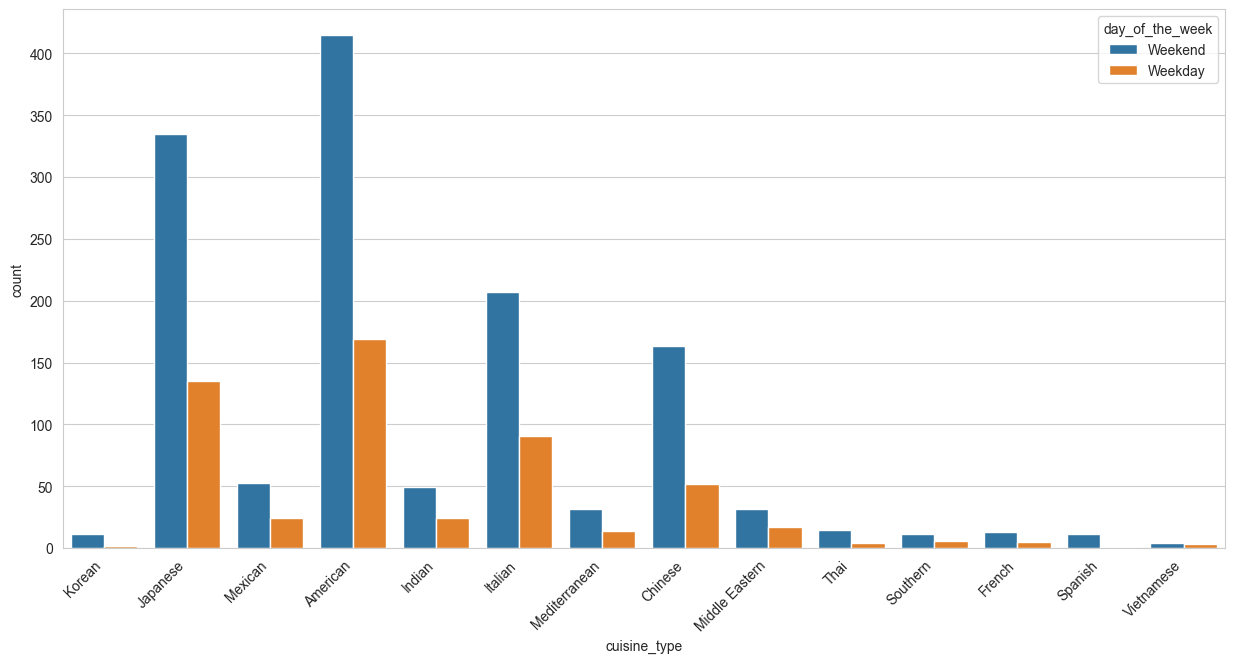

__________________________________________________________________________________________________________________________________
The most popular cuisine on weekends is American with 415 occurrences.


In [417]:
""" The relationship between the type of cuisine and the day of the week will show the most popular cuisine on the weekends"""

# Use countplot to compare the variables cuisine_type and day_of_the_week.

plt.figure(figsize=(15, 7))                               # Creates figures with 15 inches width, 7 inches height.
sns.countplot(df, x='cuisine_type',hue='day_of_the_week') # Display a countplot for the values in the column. 
plt.xticks(rotation=45, ha='right')                       # Rotate x-axis labels for better visibility
plt.show()

print('_'*130)  # Print separator line

# Calculate the count of each cuisine type during weekends
weekend_counts = df[df['day_of_the_week'].isin(['Weekend'])]['cuisine_type'].value_counts()

# Get the popular cuisine and its count during weekends
popular_cuisine = weekend_counts.idxmax()
popular_count = weekend_counts.max()

# Print the popular cuisine and count on weekends
print(f"The most popular cuisine on weekends is {popular_cuisine} with {popular_count} occurrences.")

#### Observations:
***The The most popular cuisine on weekends is American with 415 occurrences.***

* Besides American cuisine, the graph above also shows higher orders of Japanese, Italian, and Chinese cuisine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [418]:
# Sum the number of values more than 20 in the 'cost_of_the_order' column.
count_more_than_20 = (df['cost_of_the_order'] > 20).sum()

# Percentage of values more than 20 in the 'cost_of_the_order' column.
percent_count_more_than_20 = (count_more_than_20/df.shape[0])*100

# Print the percentage of the orders that cost more than 20 dollars. 
print('The percentage of orders that cost more than 20 dollars is ', percent_count_more_than_20,'%.',sep="")

The percentage of orders that cost more than 20 dollars is 29.24130663856691%.


#### Observations:
* The percentage of orders that cost more than 20 dollars is 29.24130663856691%.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [419]:
# Calculate the mean value of the 'delivery_time' column.
mean_order_delivery_time = df['delivery_time'].mean()

#Print the mean order delivery time.
print('The mean order delivery time is',mean_order_delivery_time,'minutes')

The mean order delivery time is 24.161749209694417 minutes


#### Observations:
* The mean order delivery time is 24.161749209694417 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [420]:
""" The Pandas value_counts() method returns the count of unique values in descending order, 
    the first element is the most frequently occurring element."""

# Display the count of all unique values in the customer_id column. 
print(df['customer_id'].value_counts(dropna=False))

print('_'*90) # Print separator line

# Print the message indicating the IDs of the top three most frequent customers with their number of orders.
print("The IDs of the top three most frequent customers and the number of orders they placed are:")
for customer, count in df['customer_id'].value_counts(dropna=False).head(3).items():
    print(f"{customer}: {count}")

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64
__________________________________________________________________________________________
The IDs of the top three most frequent customers and the number of orders they placed are:
52832: 13
47440: 10
83287: 9


#### Observations:
*The IDs of the top three most frequent customers and the number of orders they placed are:*
- ID#: 52832, order#: 13
- ID#:47440,  order#: 10
- ID#:83287,  order#:  9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Checking the relationship between numerical variables present in the data.

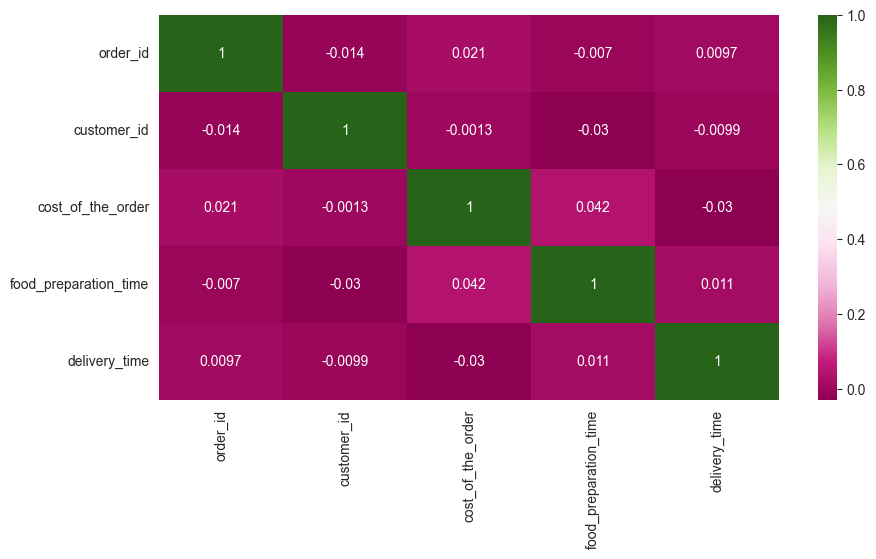

_______________________________________________________________________________________________________________________________________


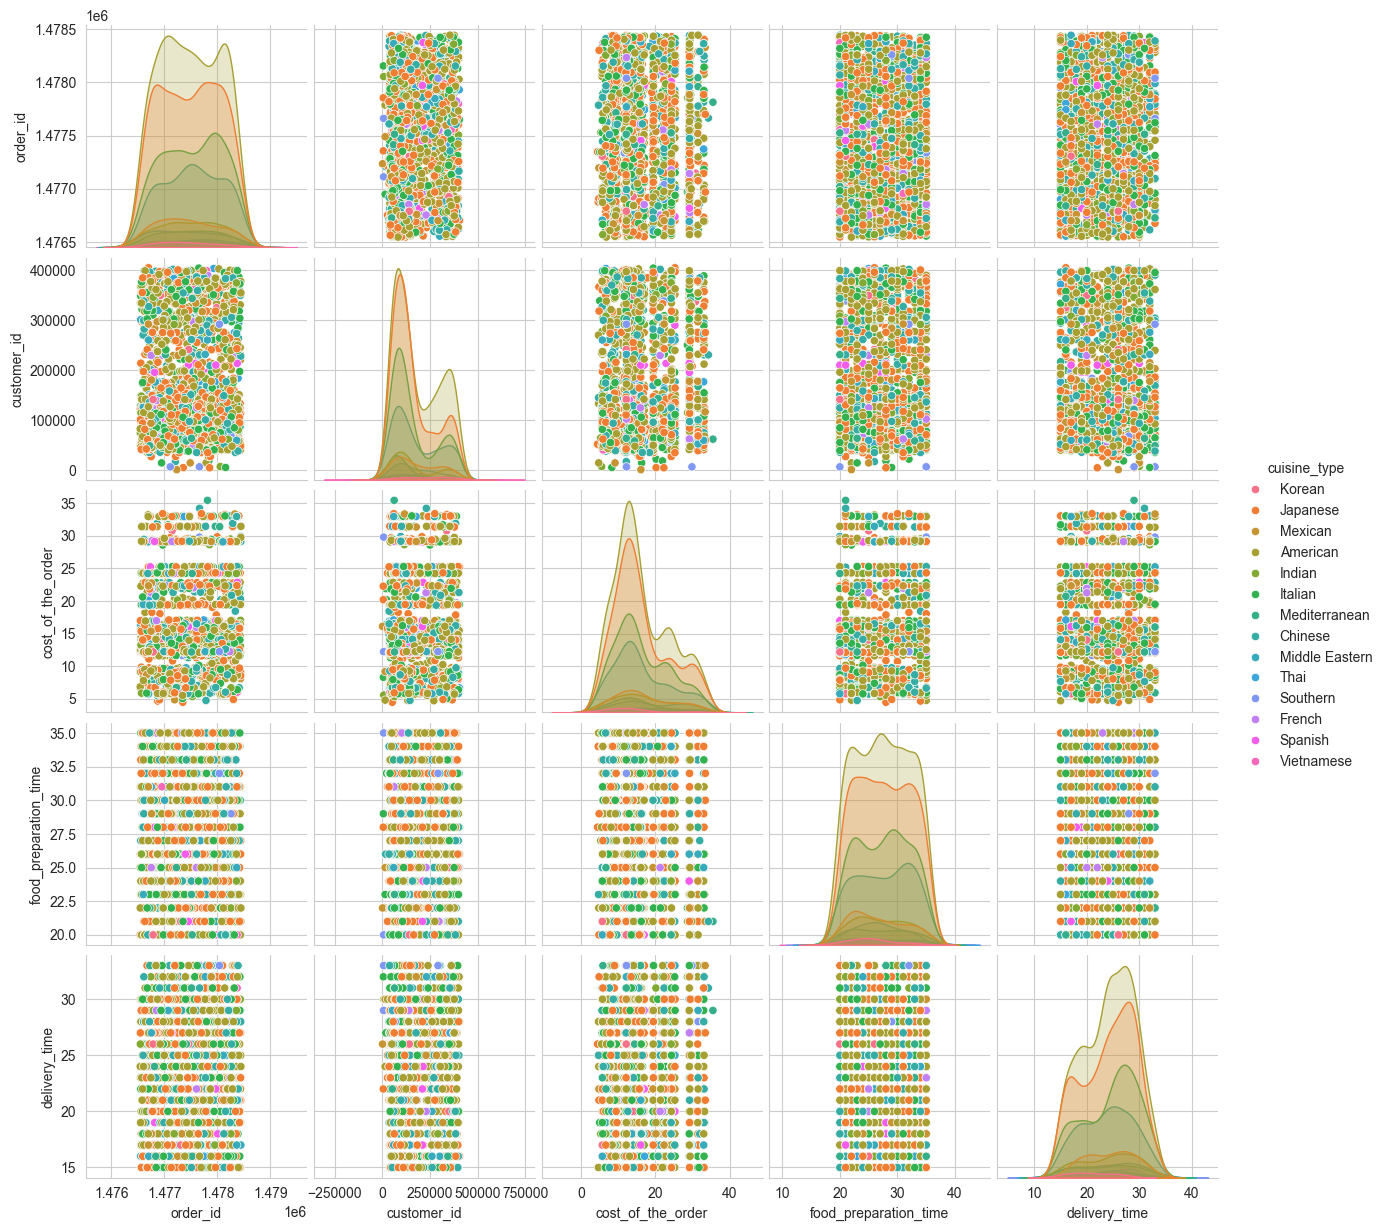

In [421]:
# Display the correlation between numeric variables in the data using heatmap. 

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="PiYG")
plt.show()

print('_'*135) # Print separator line

sns.pairplot(df, hue ='cuisine_type') 
plt.show()

### Observations: 
- The headmap and the pairplot show that there is no association between the numeric variables present in the the data.

***Next, we will explore the relationship between the categorical variables, as well as the relationship between the numerical and categorical variables.***

### Checking the relation between the restaurant name and the type of cuisine. 

In [422]:
# Display the count of unique values in the column cuisine_type in descending order. 
print(df['cuisine_type'].value_counts())

print('_'*130)  # Print separator line

## Display the count of unique values in the column restaurant_name in descending order. 
print(df['restaurant_name'].value_counts())

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
__________________________________________________________________________________________________________________________________
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64


**Note: To make a bargraph that shows relationship between the type of cuisine and the restaurant name, we will make a change in our original data. By ordering the value in the column restaurant_name so that the restaurant at the top of the column has the highest number of occurences. We will work with a copy of our original data frame.**  

In [423]:
# Make a copy of our original data frame. 
new_df = df.copy()
new_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [424]:
""" Change the column type of 'restaurant_name' in the new data frame to a categorical column """

# Sort the unique values in the column restaurant_name in ascending order of their counts.
sorted_values = data['restaurant_name'].value_counts().index.tolist()

# Convert the column 'restaurant_name' in the new data frame 'new_df' to a categorical variable with sorted values.
new_df['restaurant_name'] = pd.Categorical(new_df['restaurant_name'], categories=sorted_values, ordered=True)

# Change the column 'restaurant_name'in the data frame'new_df' to the categorical 'restaurant_name' column
new_df = new_df.sort_values('restaurant_name')

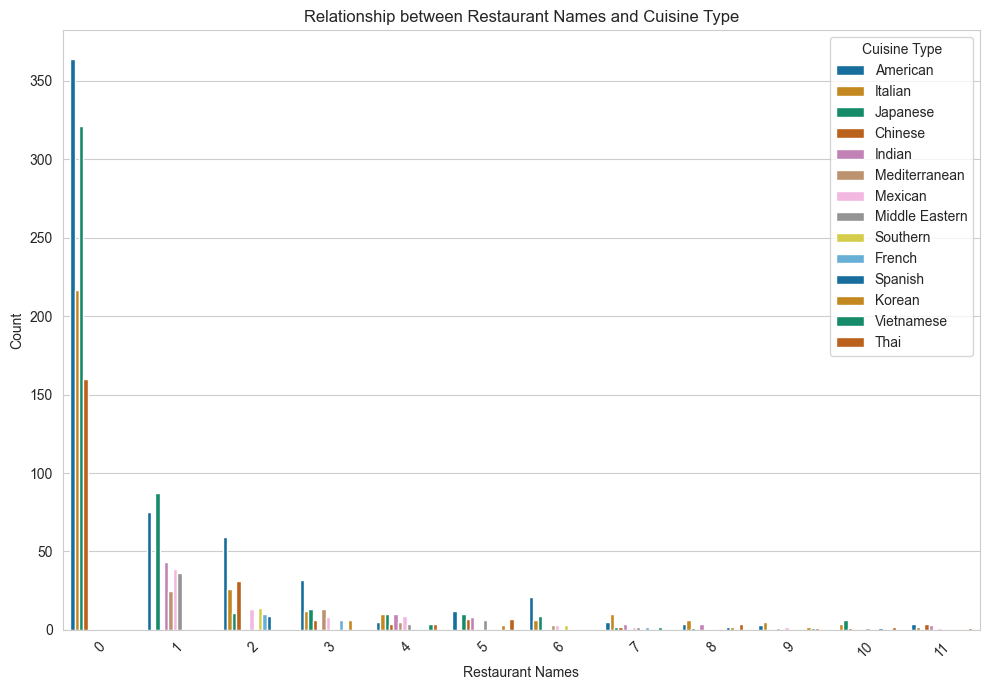

In [425]:
""" Display the relationship between restaurant_name and cuisine_type """

# Calculate the number of bins needed to have 14 values in each group in the column 'restaurant_name'. 
num_bins = len(sorted_values) // 14

# Convert categorical data to numerical codes
new_df['restaurant_code'] = new_df['restaurant_name'].cat.codes

# Create bins using the numerical codes derived from the column 'restaurant_name'.
bins = pd.cut(new_df['restaurant_code'], bins=num_bins, labels=False)

# Create a countplot with bins on the x-axis and hue as 'cuisine_type'.
plt.figure(figsize=(10, 7)) # Set the figure size for the countplot
sns.countplot(new_df, x=bins, hue='cuisine_type', palette='colorblind')

# Set labels and title for the plot
plt.xticks(rotation=45)         
plt.xlabel('Restaurant Names')
plt.ylabel('Count')
plt.title('Relationship between Restaurant Names and Cuisine Type')

plt.legend(title='Cuisine Type')  # Add legend with title for 'cuisine_type'

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [426]:
# Print the contents of the first bin, the top restaurants with the highest number of orders. 

first_bin_value = 0  # Specify the bin value of the first bin

# Get the unique values in the first bin, convert them to a list, and assign it to 'first_bin_contents'.
first_bin_contents = grouped_bins_from_restaurant_name.get_group(first_bin_value)['restaurant_name'].unique().tolist()

# Print the header indicating the bin number its values.
print(f'The restaurants in Bin {first_bin_value} are the following:')
for value in first_bin_contents:
    print(value)

The restaurants in Bin 0 are the following:
Shake Shack
The Meatball Shop
Blue Ribbon Sushi
Blue Ribbon Fried Chicken
Parm
RedFarm Broadway
RedFarm Hudson
TAO
Han Dynasty
Blue Ribbon Sushi Bar & Grill
Nobu Next Door
Sushi of Gari 46
Rubirosa
Momoya
Five Guys Burgers and Fries


### Observations:
* The graph shows a small group of 14 restaurants out of 178 that are popular for American, Italian, Japanese, and Chinese cuisine. They have about 3 times more orders than any other restaurant.The name of these restaurants are listed above from Bin 0. 
* On the business side a number of order 3 times higher than any other restaurant will generate 3 times more income.    

### Checking the relation between the restaurant name and the rating.

In [427]:
# Display the count of unique values in the column rating in descending order. 
print(df['rating'].value_counts())

print('_'*130)  # Print separator line

## Display the count of unique values in the column restaurant_name in descending order. 
print(df['restaurant_name'].value_counts())

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
__________________________________________________________________________________________________________________________________
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64


The list of restaurants in Bin 0 that is the first group of restaurants on the graph below is...

['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway', 'RedFarm Hudson', 'TAO', 'Han Dynasty', 'Blue Ribbon Sushi Bar & Grill', 'Nobu Next Door', 'Sushi of Gari 46', 'Rubirosa', 'Momoya', 'Five Guys Burgers and Fries']
____________________________________________________________________________________________________________________________________________
The list of restaurants in Bin 1 that is the second group of restaurants on the graph below is...

['Blue Ribbon Sushi Izakaya', 'Bareburger', 'Tamarind TriBeCa', "Jack's Wife Freda", 'Sushi of Gari Tribeca', 'Chipotle Mexican Grill $1.99 Delivery', 'Yama Japanese Restaurant', 'Cafe Mogador', 'The Smile', 'ilili Restaurant', 'The Kati Roll Company', 'Sushi of Gari', 'Cafe Habana', "P.J. Clarke's", 'J. G. Melon']
__________________________________________________________________

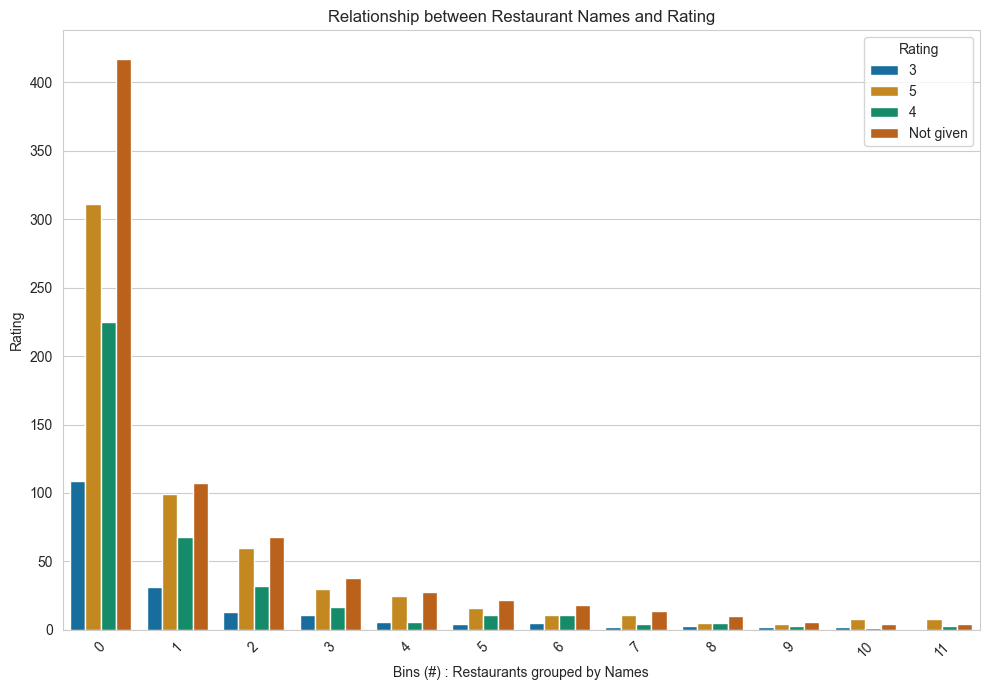

In [428]:
# Print the first two bins of the column 'restaurant_name' that hold a considerable amount of orders 

print('The list of restaurants in Bin 0 that is the first group of restaurants on the graph below is...') 
print('')
print(grouped_bins_from_restaurant_name.get_group(0)['restaurant_name'].unique().tolist())

print('_'*140) # Print separator line

print('The list of restaurants in Bin 1 that is the second group of restaurants on the graph below is...') 
print('')
print(grouped_bins_from_restaurant_name.get_group(1)['restaurant_name'].unique().tolist())

print('_'*140) # Print separator line

# Create a countplot with bins on the x-axis and set the parameter hue to 'rating'.
plt.figure(figsize=(10, 7)) # Set the figure size for the countplot
sns.countplot(new_df, x=bins, hue='rating', palette='colorblind')

# Set labels and title for the plot
plt.xticks(rotation=45)         
plt.xlabel('Bins (#) : Restaurants grouped by Names')
plt.ylabel('Rating')
plt.title('Relationship between Restaurant Names and Rating')

plt.legend(title='Rating')  # Add legend with title for 'cuisine_type'

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Observations:
* The bar graph shows a high number of rating for restaurants in Bin(0). At least 3 times more rating than any others restaurant. This aligns with the fact the restaurants in Bin(0) have the highest number of orders compare to the rest. 

### Let's explore the relationship between the restaurant names, their total number of ratings, and their mean ratings. 

- A copy of the data frame will be created to perform this task.

In [429]:
# Create a copy of 'new_df', the data frame we copied from our original data in this IDE. 
new_1_df = new_df.copy()
new_1_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,restaurant_code
813,1477164,74424,Shake Shack,American,15.77,Weekend,3,29,20,0
1637,1477965,384411,Shake Shack,American,19.45,Weekday,3,24,29,0
1004,1477453,83287,Shake Shack,American,9.41,Weekend,5,22,20,0
997,1478270,303548,Shake Shack,American,14.02,Weekend,4,20,21,0
1331,1476609,48677,Shake Shack,American,8.34,Weekend,Not given,23,28,0


In [430]:
# Convert the 'rating' column to numeric (excluding 'no given' values)
new_1_df['rating'] = pd.to_numeric(new_1_df['rating'], errors='coerce')

# Group by 'restaurant_name' and calculate total number of ratings and mean rating
grouped_data = new_1_df.groupby('restaurant_name',observed=True)['rating'].agg(['count', 'mean']).reset_index()

grouped_data.columns = ['restaurant_name', 'total_ratings', 'mean_rating']

grouped_data

,restaurant_name,total_ratings,mean_rating
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125
4,Parm,39,4.128205
...,...,...,...
173,Big Wong Restaurant _¤¾Ñ¼,0,NaN
174,Lucky Strike,1,4.000000
175,Hunan Manor,1,5.000000
176,The MasalaWala,1,4.000000


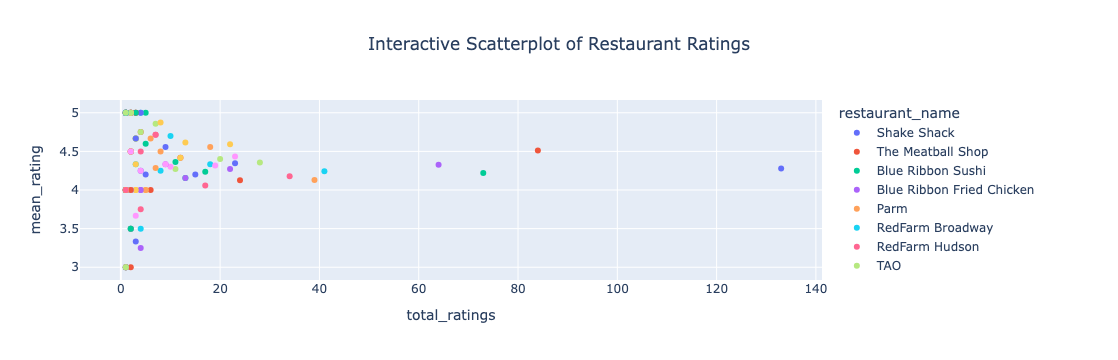

In [431]:
import plotly.express as px

# Plotting an interactive scatterplot with Plotly
fig = px.scatter(grouped_data, x='total_ratings', y='mean_rating', color='restaurant_name',
                 hover_name='restaurant_name', title='Interactive Scatterplot of Restaurant Ratings')
fig.update_layout(title_x=0.5)  # Center the title
fig.show()

### Observations:
* The interactive scatterplot above shows the most rated restaurants and their average rates. It helps differentiating the average rating to the total number of ratings each restaurant received.
* On the business side the five best performing restaurant are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and RedFarm Broadway. As the mean of their ratings against the total number of ratings weights more than the other restaurants. 

### Checking relationship between the ratings and the waiting time before the customers received their orders

In [432]:
# Create a new column 'total_time_elapsed' in the data frame new_1_df. 
new_1_df['total_time_elapsed'] = new_1_df['food_preparation_time'] + new_1_df['delivery_time']

## Display the count of unique values in the column total_time_elapsed in descending order.
new_1_df['total_time_elapsed'].value_counts()

total_time_elapsed
54    125
56    111
51    108
50    108
49    101
53    100
55     97
48     94
47     86
46     84
58     83
52     79
45     62
59     59
43     56
57     55
61     53
44     46
40     46
60     45
42     40
62     40
64     34
63     33
41     28
38     28
39     22
65     19
36     16
37     16
67      9
68      7
66      5
35      3
Name: count, dtype: int64

In [433]:
# Print the minimum and the maximum the column 'total_time_elapsed'in the data 'new_1_df'
print('The minimum value of the column total_time_elapsed is',new_1_df['total_time_elapsed'].min())
print('_'*55) # print separator  
print('The maximum value of the column total_time_elapsed is',new_1_df['total_time_elapsed'].max())

The minimum value of the column total_time_elapsed is 35
_______________________________________________________
The maximum value of the column total_time_elapsed is 68


***The minimum and maximum value of in the column 'total_time_elapsed' are respectively 35 and 68. 
   We will create bins for the column 'total_time_elapsed' as follows***
   
* 35 - 45 min  - The property will be said to be in **`Low`** location.
* 45 - 55 min - The property will be said to be in **`Average`** location.
* 55 - 68 min - The property will be said to be in **`High`** away location.

In [434]:
# using pd.cut() function to create bins and add a column 'total_time_elapsed_bin' to the data 'new_1_df'.
new_1_df['total_time_elapsed_bins'] = pd.cut(new_1_df['total_time_elapsed'],bins=[35,45,55,68],labels=['Low','Average','High'], right = False)


# Group by 'total_time_elapsed_bins' and calculate total number of ratings and mean rating
grouped_time_data = new_1_df.groupby('total_time_elapsed_bins',observed=True)['rating'].agg(['count', 'mean']).reset_index()

grouped_time_data.columns = ['total_time_elapsed_bins', 'total_ratings', 'mean_rating']
grouped_time_data

,total_time_elapsed_bins,total_ratings,mean_rating
0,Low,184,4.396739
1,Average,587,4.328790
2,High,387,4.343669


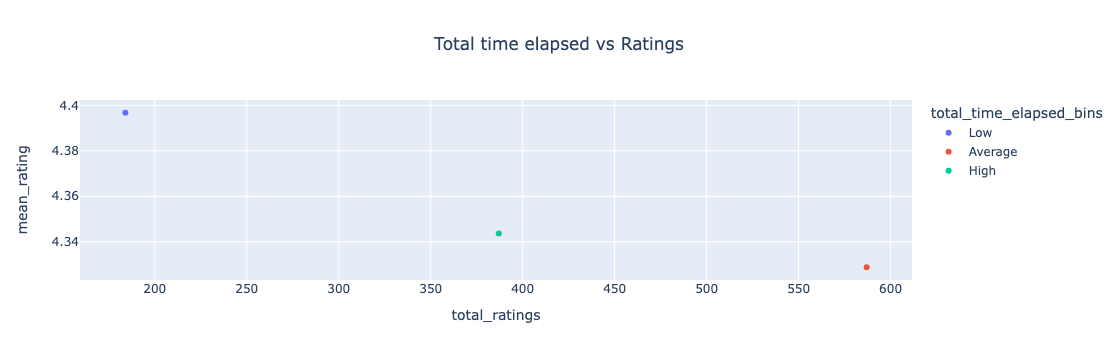

In [435]:
# Create a scatterplot with the total_time_elapsed on the x-axis and the ratings on the y-axis

fig = px.scatter(grouped_time_data, x='total_ratings', y='mean_rating', color='total_time_elapsed_bins',
                 hover_name='total_time_elapsed_bins', title='Total time elapsed vs Ratings')
fig.update_layout(title_x=0.5)  # Center the title
fig.show()

***The interactive scatterplot of the total waiting time against the ratings shows that average time elapsed before the customers received their orders has a rating higher than the two other categories of time elapsed.*** 

Also, the total number of ratings varies by about 195 from one category to another, that's from Low to High, then from High to Average.
* There are 184 ratings for lower total time elapsed.
* There are 387 ratings for high total time elapsed.
* There are 587 ratings for average total time elapsed

### Checking the relationship between the cost_of_the_order and the ratings

In [436]:
# Display the count of all unique values in the column 'cost_of_the_order'. 
new_1_df['cost_of_the_order'].value_counts(dropna=False)

cost_of_the_order
12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
15.04     1
20.32     1
19.59     1
31.86     1
29.83     1
Name: count, Length: 312, dtype: int64

In [437]:
# Print the minimum and the maximum of the column 'cost_of_the_order'in the data 'new_1_df'
print('The minimum value the column cost_of_the_order is',new_1_df['cost_of_the_order'].min())
print('_'*55) # print separator  
print('The maximum value the column cost_of_the_order is',new_1_df['cost_of_the_order'].max())

The minimum value the column cost_of_the_order is 4.47
_______________________________________________________
The maximum value the column cost_of_the_order is 35.41


***The minimum and maximum value of in the column 'cost_of_the_order' are respectively 4.47 and 35.41. 
   We will create bins for cost_of_the_order as follows***
   
* 4.47 - 15 USD  - The cost of the order will be said to be of **`Moderate`** price.
* 15 - 25   USD - The cost of the order will be said to be of **`Average`** price.
* 25 - 35.41 USD - The cost of the order will be said to be of **`High`** price.

In [438]:
# using pd.cut() function to create bins and add a column 'cost_of_the_order_bins' to the data 'new_1_df'.
new_1_df['cost_of_the_order_bins'] = pd.cut(new_1_df['cost_of_the_order'],bins=[4.47,15,25,35.41],labels=['Moderate','Average','High'], right = False)


# Group by 'total_time_elapsed_bins' and calculate total number of ratings and mean rating
grouped_cost_of_the_order_data = new_1_df.groupby('cost_of_the_order_bins',observed=True)['rating'].agg(['count', 'mean']).reset_index()

grouped_cost_of_the_order_data.columns = ['cost_of_the_order_bins', 'total_ratings', 'mean_rating']
grouped_cost_of_the_order_data

,cost_of_the_order_bins,total_ratings,mean_rating
0,Moderate,597,4.311558
1,Average,366,4.401639
2,High,198,4.338384


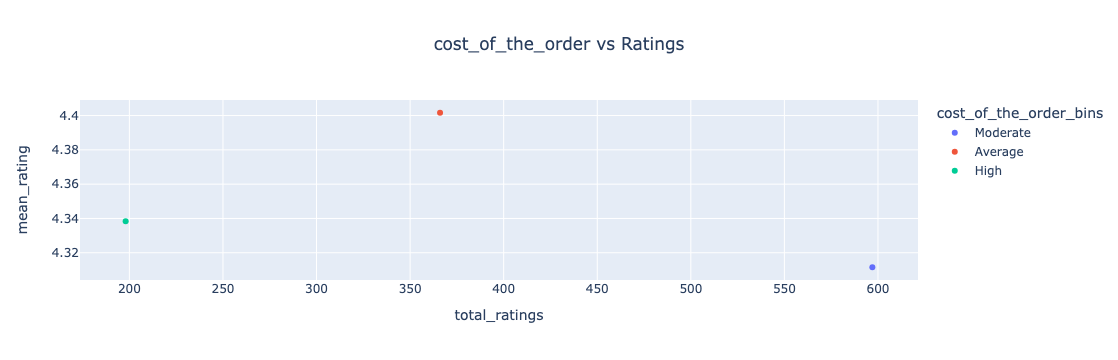

In [439]:
# Create a scatterplot with the cost_of_the_order on the x-axis and the ratings on the y-axis

fig = px.scatter(grouped_cost_of_the_order_data, x='total_ratings', y='mean_rating', color='cost_of_the_order_bins',
                 hover_name='cost_of_the_order_bins', title='cost_of_the_order vs Ratings')
fig.update_layout(title_x=0.5)  # Center the title
fig.show()

***The interactive scatterplot of the cost_of_order against the ratings shows that orders of average cost are rated slightly above the two      other categories of cost. However, the number of ratings varies***

* There are 198 ratings for the cost of orders that are classified as high.
* There are 366 ratings for the cost of orders that are classified as average.
* There are 597 ratings for the cost of orders that are classified as low.
  
So, the lower the cost of the orders, the higher the number ratings goes. On the business side customers satisfaction is more accurate when there is more ratings and lower cost orders provide this.  

### Checking the relationship between the cost_of_the_order, the total waiting time before delivery, and the ratings

In [440]:
# Group by 'cost_of_the_order_bins' and the total_time_elapsed_bins, and calculate total number of ratings and mean rating
grouped_cost_of_the_order_bins_data = new_1_df.groupby(['cost_of_the_order_bins','total_time_elapsed_bins'],
                                      observed=True)['rating'].agg(['count', 'mean']).reset_index()

grouped_cost_of_the_order_bins_data.columns = ['cost_of_the_order_bins','total_time_elapsed_bins', 'total_ratings', 'mean_rating']
grouped_cost_of_the_order_bins_data	

,cost_of_the_order_bins,total_time_elapsed_bins,total_ratings,mean_rating
0,Moderate,Low,90,4.477778
1,Moderate,Average,306,4.258170
2,Moderate,High,199,4.316583
3,Average,Low,54,4.333333
4,Average,Average,189,4.423280
5,Average,High,121,4.404959
6,High,Low,40,4.300000
7,High,Average,91,4.373626
8,High,High,67,4.313433


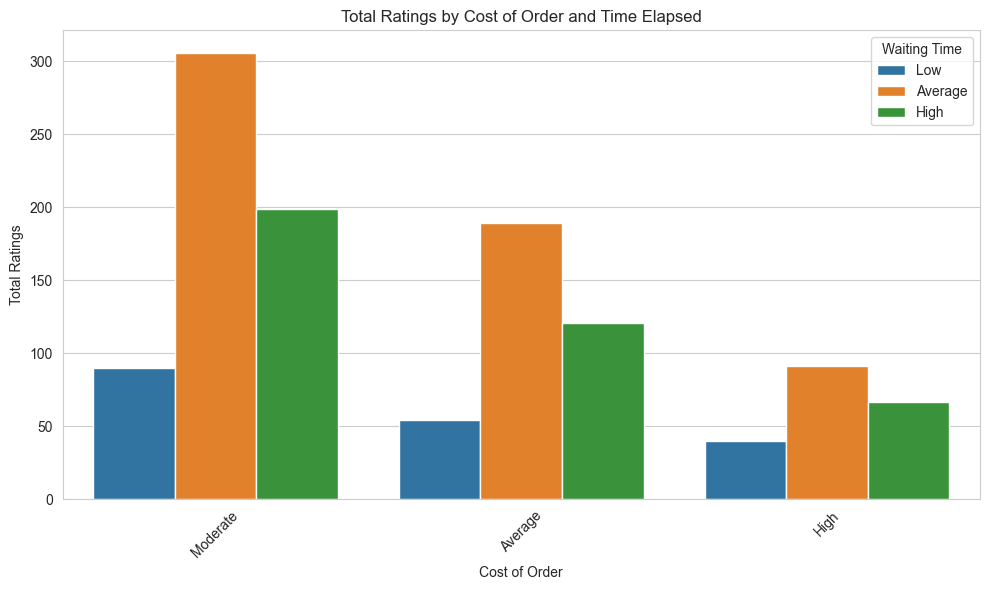

In [441]:
# Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='cost_of_the_order_bins', y='total_ratings', hue='total_time_elapsed_bins', data=grouped_cost_of_the_order_bins_data	)
plt.title('Total Ratings by Cost of Order and Time Elapsed')
plt.xlabel('Cost of Order')
plt.ylabel('Total Ratings')
plt.legend(title='Waiting Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations:
* The bar graph above shows that the total number of ratings is decreasing as the cost of the orders move from moderate to high. So the more       expensive an order is the less chance it will be rated.
* The business can better assess customers satisfaction with the cost of the order within the moderate range defined as 4.47 - 15 USD  

### Checking the relationship between total number of not rated orders with the cost of the orders grouped in bins 

In [442]:
# Group by 'the_cost_of_order' and count the number of NaN values in 'rating' within each group
nan_counts = new_1_df[new_1_df['rating'].isna()].groupby('cost_of_the_order_bins',observed=True).size().reset_index(name='nan_counts')

nan_counts.columns = ['cost_of_the_order_bins','nan_counts']

nan_counts

,cost_of_the_order_bins,nan_counts
0,Moderate,411
1,Average,219
2,High,106


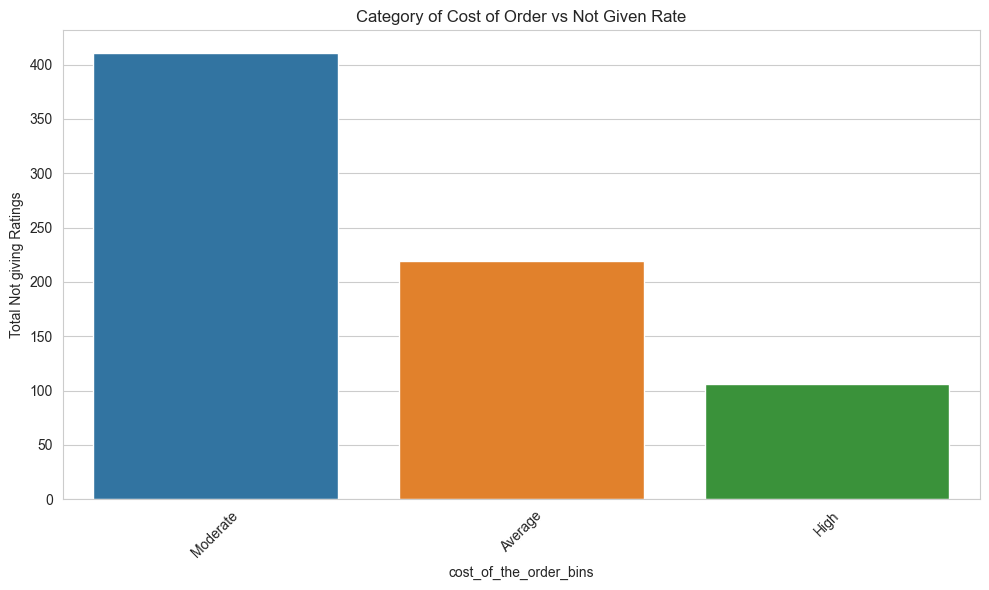

In [443]:
# Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='cost_of_the_order_bins', y='nan_counts', hue='cost_of_the_order_bins', data=nan_counts)
plt.title('Category of Cost of Order vs Not Given Rate')
plt.xlabel('cost_of_the_order_bins')
plt.ylabel('Total Not giving Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations:
*In summary, the relationship between the total number of not rated orders and the cost of the orders grouped in bins highlights the frequency of NaN values (missing or not given ratings) in the data set categorized by different levels Moderate, Average, and High. It indicates that missing ratings are relatively more common when the cost of the orders are classified under 'Moderate' cost compared to 'Average' and 'High' costs.*

### Checking the relation between the cost of the order and the rating

The average cost of the order is 16.498851422550054 USD
 
The cost of the order ranges from 4.47 to 35.41
____________________________________________________________________________________________________________________________________________


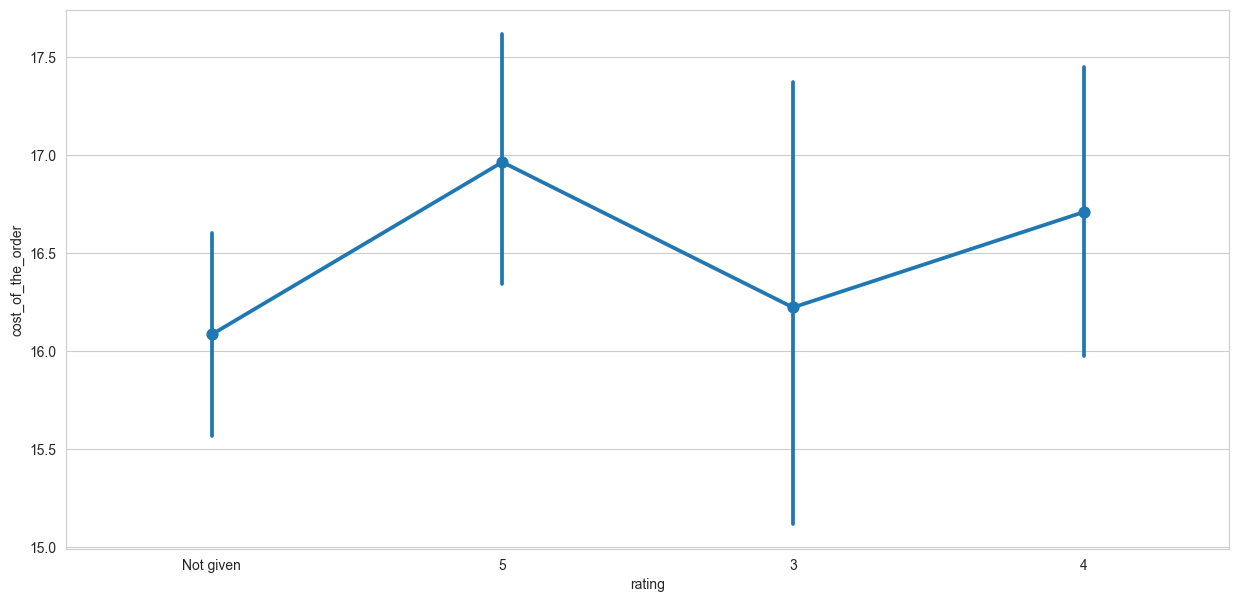

In [444]:
# Printing the average cost of the order
print('The average cost of the order is', df['cost_of_the_order'].mean(), 'USD')

print(' ')  # Printing a blank line for readability

# Printing the range of cost of the order
print('The cost of the order ranges from', df['cost_of_the_order'].min(), 'to', df['cost_of_the_order'].max())

# Printing a line of underscores to visually separate sections
print('_' * 140)

# Creating a pointplot to visualize the relation between the cost of the order and the ratings
plt.figure(figsize=(15, 7))                                # Setting the size of the figure
sns.pointplot(x='rating', y='cost_of_the_order', data=df)  # Creating the pointplot
plt.show()                                                

### Observations:
* While the cost of the order range from $4.47 to $35.41 its mean is $16.5. The graph shows that the cost of the orders that were rated is not far from the average cost of the orders.
* On the business side: To assess customer satisfaction it would make sense to use prices not far from $16.5 where there is a concentration of customer feedback.   

### Checking the relation between the cost of the order, the type of cuisine, and the cost of the order grouped in bins.

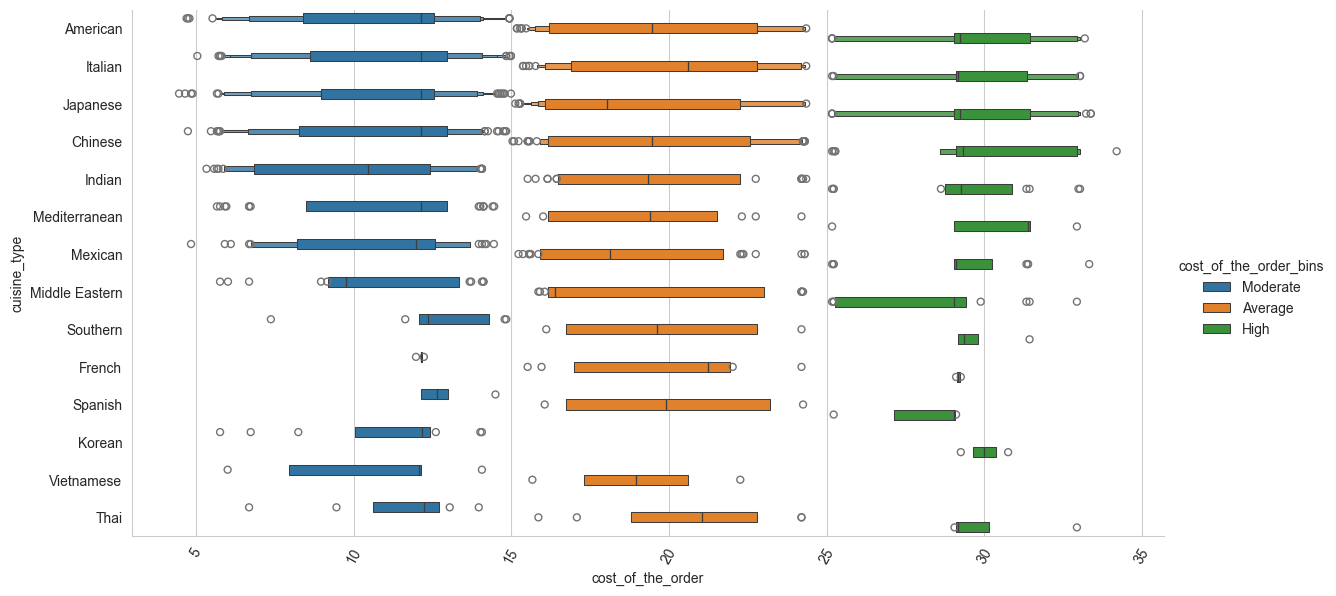

In [445]:
# Create a catplot with the columns "cost_of_the_order","cuisine_type", and "cost_of_the_order_bins".
sns.catplot(data=new_1_df, x="cost_of_the_order", y="cuisine_type", 
            hue="cost_of_the_order_bins", kind="boxen",height=6, aspect=2)
plt.xticks(rotation = 60)
plt.show()

### Observations:
* American, Italian, Japanese, Chinese, Indian, Mediterranean, and Mexican cuisines have a wide range of price within $4.7 -$15 which were categorized as Moderate.
* French cuisine doesn't have moderat price within the range $4.7 - $15.

### Checking the relationship between the Cost of order grouped in bins/category, the total number of order, and the day of the week.*** 
*The type of cuisine will be used to count the number of orders, as each type corresponds to an order made* 

In [446]:
# Group the DataFrame 'new_1_df' by 'cost_of_the_order_bins' and 'day_of_the_week',
# and count the occurrences of 'cuisine_type' within each group.

orders_cost_count = new_1_df.groupby(['cost_of_the_order_bins', 'day_of_the_week'], observed=True)['cuisine_type'].count().reset_index()

# Rename the columns of the resulting DataFrame to 'cost_of_the_order_bins', 'day_of_the_week',
# and 'total_orders' for clarity.

orders_cost_count.columns = ['cost_of_the_order_bins', 'day_of_the_week', 'total_orders']

# Display the resulting DataFrame 'orders_cost_count'
orders_cost_count

,cost_of_the_order_bins,day_of_the_week,total_orders
0,Moderate,Weekday,296
1,Moderate,Weekend,712
2,Average,Weekday,163
3,Average,Weekend,422
4,High,Weekday,87
5,High,Weekend,217


Text(0.5, 1.05, 'Category of Cost of Order vs Total number of order & Day of the week')

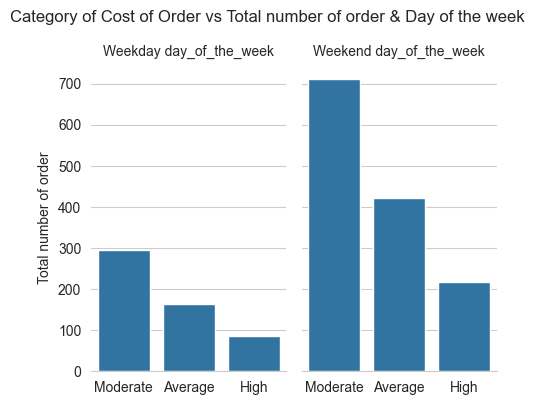

In [447]:
# Set the seaborn style to have a grid background
sns.set_style("whitegrid")  # Set the background style to white with grid lines

# Create the catplot with grid background
g = sns.catplot(data=orders_cost_count, x="cost_of_the_order_bins", 
                y="total_orders", col="day_of_the_week", kind="bar", height=4, aspect=.6)  

g.set_axis_labels("", "Total number of order")      # Set axis labels
g.set_xticklabels(["Moderate", "Average", "High"])  # Set x-axis tick labels
g.set_titles("{col_name} {col_var}")                # Set titles for each subplot based on column variable
g.despine(left=True)                                # Remove left spine (vertical line) in each subplot
# Add a title to the entire plot
g.fig.suptitle('Category of Cost of Order vs Total number of order & Day of the week', y=1.05)

### Observations:
* For each category of cost there are more orders over the weekend than on weekday. The number of orders over the weekends is more than the double the number of orders made on weekdays.
  
***Next we will check our the high number of orders on weekends affect the delivery and the food preparation time.*** 

### Checking the relationship between the delivery time and the day of the week.
    There are more orders on the weekends than on the weekdays. How would this affect the delivery time?  

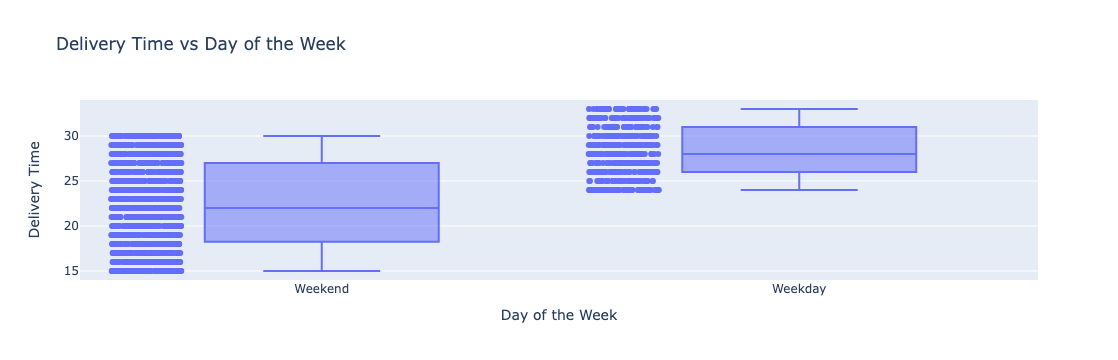

In [448]:
# Create an interactive boxplot using Plotly Express
fig = px.box(new_1_df, x='day_of_the_week', y='delivery_time', points="all", title='Delivery Time vs Day of the Week',
             labels={'day_of_the_week': 'Day of the Week', 'delivery_time': 'Delivery Time'})

# Show the interactive boxplot
fig.show()

### Observations:

* The relation between the delivery time and the day of the week shows that delivery time is usually shorter on the weekend. The median of delivery time increases on weekdays.

### Checking the relationship between the food preparation time and the day of the week.

- There are more orders the weekends than on the weekdays. How would this affect the food preparation time?  

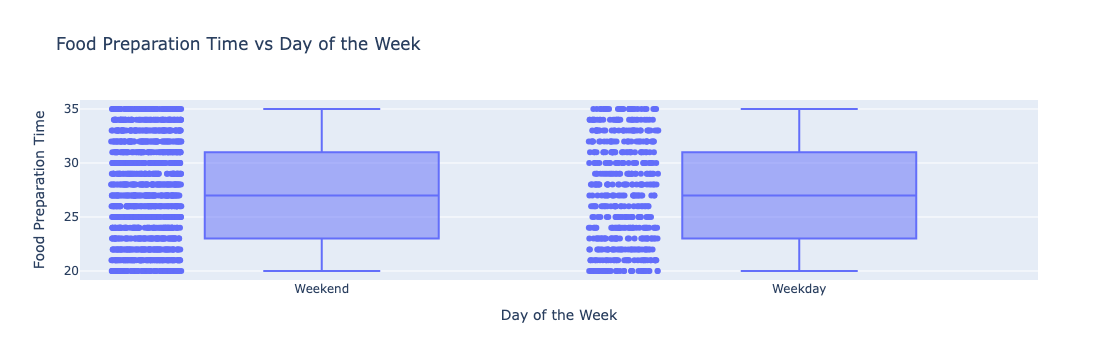

In [449]:
# Create an interactive boxplot using Plotly Express
fig = px.box(new_1_df, x='day_of_the_week', y='food_preparation_time', points="all", title='Food Preparation Time vs Day of the Week',
             labels={'day_of_the_week': 'Day of the Week', 'food_preparation_time': 'Food Preparation Time'})

# Show the interactive boxplot
fig.show()

### Observations:

* The relation between the food preparation time and the day of the week shows no change on the food preparation time on weekday and weekend.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

### Using visualization to find the restaurants fulfilling the criteria to get promotional offer. 
***The above graph exploring the relationship between the restaurant names, their total number of ratings, and their mean ratings
  would help identifying these restaurants.*** 

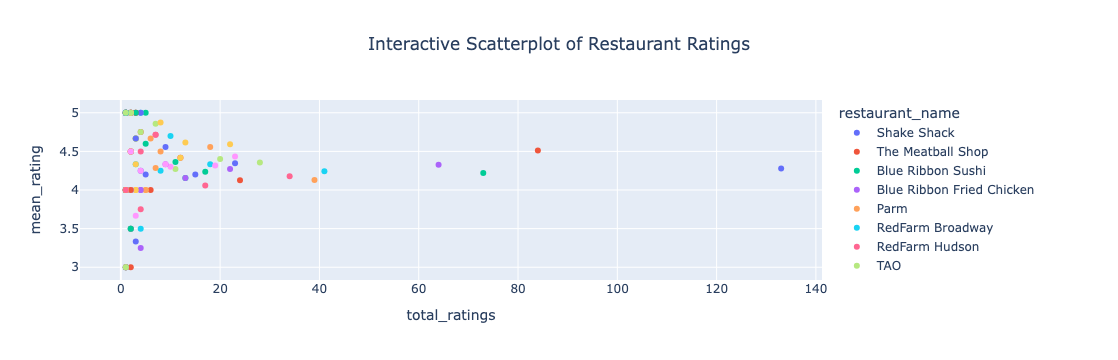

In [450]:
# Plotting an interactive scatterplot with Plotly
fig = px.scatter(grouped_data, x='total_ratings', y='mean_rating', color='restaurant_name',
                 hover_name='restaurant_name', title='Interactive Scatterplot of Restaurant Ratings')
fig.update_layout(title_x=0.5)  # Center the title
fig.show()

### Observations:
***Hovering the point on the graph from the right to the left***
* Shake Shack has 133 ratings with an average_rating=4.2781195
* The Meatball Shop has 84 ratings with an average_ratings=4.511905
* Blue Ribbon Sushi has 73 ratings with an average_ratings=4.219178
* Blue Ribbon Fried Chicken has 64 ratings with an average_ratings=4.328125

**So there are 4 restaurants that fulfill the criteria**

The graph also shows that only **14 restaurants** scored an average rating **less or equal to 4***. 

In [451]:
#Creating a function that will generate the name of the restaurant that fulfill the criteria to get promotional offer

def generate_promotional_offer(dataframe):
    # Filter the DataFrame based on the criteria to get promotional offer
    filtered_data = dataframe[(dataframe['total_ratings'] > 50) & (dataframe['mean_rating'] > 4)]
    print('The restaurants fulfilling the criteria are the following:')
    print("-" * 40)  # Adding a print separator 
    # Print the restaurant names along with corresponding total ratings and mean ratings
    for index, row in filtered_data.iterrows():
        print(f"Restaurant Name: {row['restaurant_name']}")
        print(f"Total Ratings: {row['total_ratings']}")
        print(f"Mean Rating: {row['mean_rating']}")
        print("-" * 40)  # Adding a separator between each restaurant's information

In [452]:
generate_promotional_offer(grouped_data)

The restaurants fulfilling the criteria are the following:
----------------------------------------
Restaurant Name: Shake Shack
Total Ratings: 133
Mean Rating: 4.2781954887218046
----------------------------------------
Restaurant Name: The Meatball Shop
Total Ratings: 84
Mean Rating: 4.511904761904762
----------------------------------------
Restaurant Name: Blue Ribbon Sushi
Total Ratings: 73
Mean Rating: 4.219178082191781
----------------------------------------
Restaurant Name: Blue Ribbon Fried Chicken
Total Ratings: 64
Mean Rating: 4.328125
----------------------------------------


#### Observations:

* Shake Shack is the most popular restaurant with 133 ratings and and average of 4.28.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [453]:
def calculate_net_revenue(dataframe):
    # Define a function to calculate charges based on order cost
    def calculate_charge(cost):
        if cost > 20:
            return cost * 0.25  # 25% charge
        elif cost > 5:
            return cost * 0.15  # 15% charge
        else:
            return 0  # No charge

    # Apply the calculate_charge function to the 'cost_of_the_order' column and create a column 'charge' in the dataframe
    dataframe['charge'] = dataframe['cost_of_the_order'].apply(calculate_charge)

    # Calculate the net revenue generated across all orders
    net_revenue = dataframe['charge'].sum()
    # Print net revenue generated across all orders
    print(f"The net revenue generated across all orders is ${net_revenue:.2f}")

In [454]:
calculate_net_revenue(new_1_df)

The net revenue generated across all orders is $6166.30


#### Observations:
* The net revenue generated across all orders is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

**Use the column 'total_time_elapsed'= 'food_preparation_time'+ 'delivery_time', already created in the data new_1_df**

In [455]:
# Calculate the percentage of values in 'total_time_elapsed' that are more than 60

total_count = len(new_1_df)                                              # Total number of rows in the dataframe
count_more_than_60 = len(new_1_df[new_1_df['total_time_elapsed'] > 60])  # Number of rows where 'total_time_elapsed' > 60

percentage_more_than_60 = (count_more_than_60 / total_count) * 100

print(f"Percentage of orders that take more than 60 minutes is : {percentage_more_than_60:.2f}%")

Percentage of orders that take more than 60 minutes is : 10.54%


#### Observations:
* Percentage of orders that take more than 60 minutes is : 10.54%.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [456]:
# Group by 'day_of_the_week' and the 'delivery_time', and calculate the mean delivery time. 
grouped_day_of_the_week_data = new_1_df.groupby('day_of_the_week',
                                      observed=True)['delivery_time'].agg('mean').reset_index()

grouped_day_of_the_week_data.columns = ['day_of_the_week','mean_delivery_time']

print(grouped_day_of_the_week_data)	

print('_'*40)
print('The mean delivery time on weekdays is:',grouped_day_of_the_week_data.loc[0,'mean_delivery_time'],'minutes')
print(" ")
print('_'*40)
print('The mean delivery time on weekends is:',grouped_day_of_the_week_data.loc[1,'mean_delivery_time'],'minutes')

  day_of_the_week  mean_delivery_time
0         Weekday           28.340037
1         Weekend           22.470022
________________________________________
The mean delivery time on weekdays is: 28.340036563071298 minutes
 
________________________________________
The mean delivery time on weekends is: 22.4700222057735 minutes


#### Observations:

* The mean delivery time on weekdays is: 28.340036563071298 minutes.
* The mean delivery time on weekends is: 22.4700222057735 minutes.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

We analyzed the dataset of 1897 online food orders from restaurants in New York. The dataset provides customer satisfaction and favorite restaurants. We are interested in the number of orders to improve the revenue. We, therefore, analyzed the factors that affect the number of orders and concluded the following.

1. The most popular cuisines listed in order are American, Japanese, Italian, then Chinese cuisine.
2. The first five customers' favorite restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and RedFarm Broadway.  
3. There are over 2 times more orders on weekends than on weekdays.
4. There is a small group of 14 restaurants ('Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway', 'RedFarm Hudson', 'TAO', 'Han Dynasty', 'Blue Ribbon Sushi Bar & Grill', 'Nobu Next Door', 'Sushi of Gari 46', 'Rubirosa', 'Momoya', 'Five Guys Burgers and Fries')out the 178 restaurants that have about 3 times more orders than any other restaurant. 
5. The number of orders that cost less than 20$ represents 70% of the total number of orders.
6. It’s surprising to notice that deliveries take more time on weekdays than on weekends though there are more orders on the weekends. We need to investigate what causes this to happen.
7. It’s good to see that with regard to food preparation time, the restaurants perform similarly on weekdays and weekends.

### Recommendations:

1.  The restaurant Shake Shack has lots of potential to increase revenue based on the number of orders. The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and RedFarm Broadway also show similar potential.
2.  Weekends are a market niche for a high number of orders.
3. Procure data for delivery fleet size and availability on both weekdays and weekends to investigate the reasons for higher delivery time on weekdays and explore ways to reduce the weekday delivery time to at least the same as the weekend delivery times.
4. The cuisine type and orders that cost less than 20 USD are market niches to improve revenue based on the number of orders.
5. The exploration of low-cost orders that are orders that cost $20 and less would give a better assessment of customer satisfaction, as the group generates more ratings.

---